In [25]:
import pandas as pd
df = pd.read_csv('./data/wine_data.csv')
df.columns

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline', 'class'],
      dtype='object')

In [26]:
features = ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline']
X = df[features]
y = df['class']

In [27]:
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X,y,random_state=0)

In [28]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X_tn_std)
X_tn_pca = pca.transform(X_tn_std)
X_te_pca = pca.transform(X_te_std)

In [30]:
print(X_tn_std.shape)
print(X_tn_pca.shape)

(133, 13)
(133, 2)


In [31]:
print(pca.singular_values_)

[25.3887705  18.00040359]


In [32]:
print(pca.components_)

[[ 0.14285263 -0.24443441 -0.01392104 -0.24517361  0.1315099   0.38923734
   0.42471766 -0.30128613  0.30523465 -0.10462106  0.30267149  0.37266737
   0.29150867]
 [-0.50194071 -0.23015832 -0.31022311  0.03872248 -0.23858952 -0.09688729
  -0.01451474 -0.03693926 -0.0584635  -0.54240798  0.28168064  0.16944035
  -0.35182263]]


In [33]:
print(pca.explained_variance_)

[4.88325506 2.45465553]


In [34]:
print(pca.explained_variance_ratio_)

[0.37281068 0.18739996]


In [38]:
pca_columns = ['pca_comp1', 'pca_comp2']
X_tn_pca_df = pd.DataFrame(X_tn_pca, columns = pca_columns)
y_tn1 = y_tn.reset_index(drop=True)
X_tn_pca_df['target'] = y_tn1
X_tn_pca_df.head(10)

,pca_comp1,pca_comp2,target
0,2.128500,-1.019732,0
1,-2.948125,-0.254807,2
2,1.919795,1.337012,1
3,-2.133376,-0.945897,2
4,2.236803,-2.269839,0
5,-2.287471,-0.199359,2
6,-2.972450,-0.296523,2
7,2.618098,-0.776070,0
8,-1.047055,-3.490933,2
9,2.609816,0.073457,0


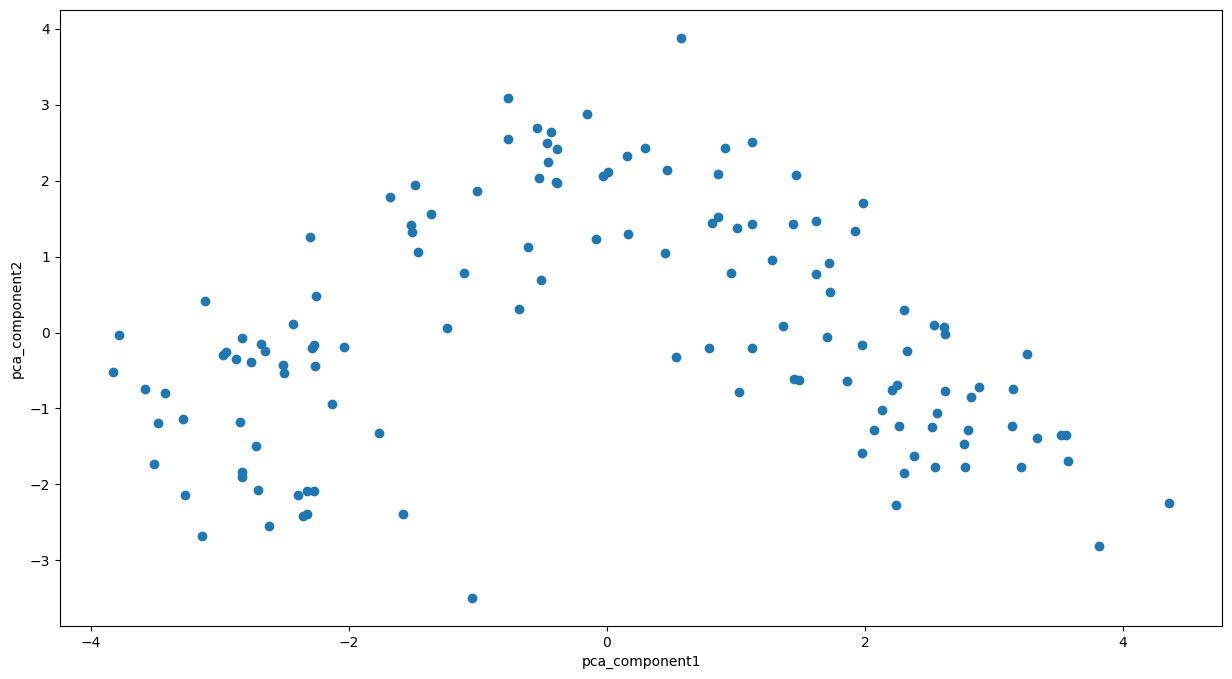

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.scatter(X_tn_pca_df['pca_comp1'],
X_tn_pca_df['pca_comp2'], marker = 'o')
plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.show()

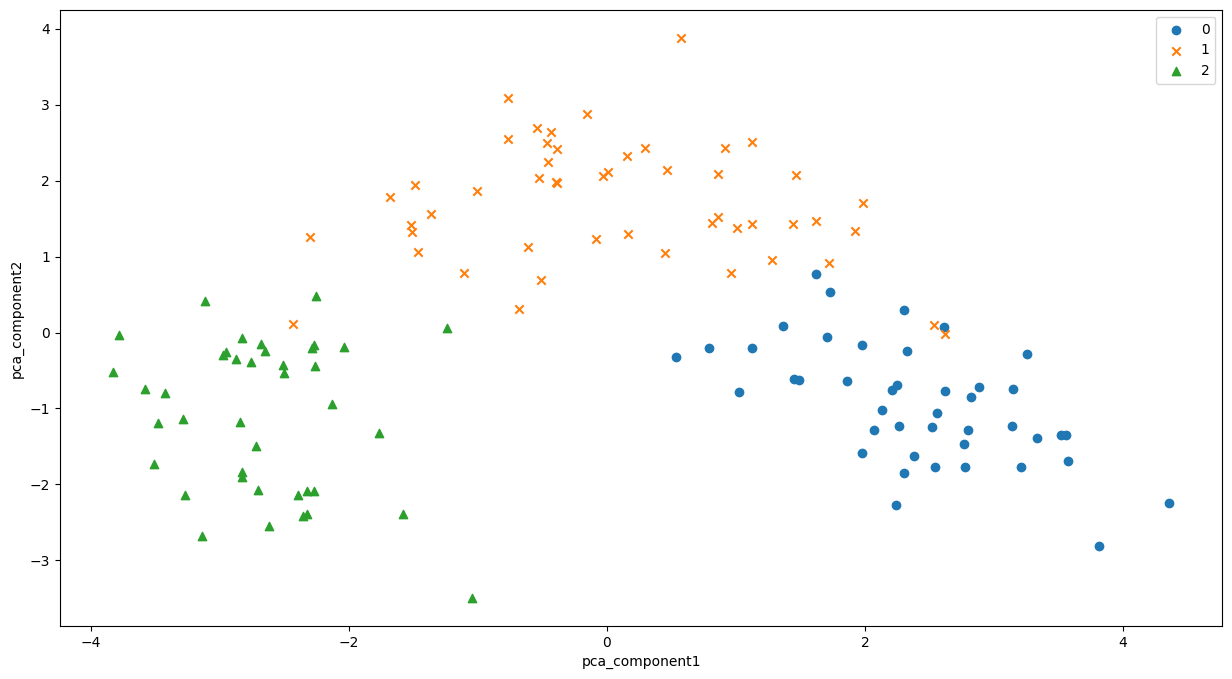

In [41]:
df = X_tn_pca_df
df_0 = df[df['target'] ==0]
df_1 = df[df['target'] ==1]
df_2 = df[df['target'] ==2]

X_11 = df_0['pca_comp1']
X_12 = df_1['pca_comp1']
X_13 = df_2['pca_comp1']

X_21 = df_0['pca_comp2']
X_22 = df_1['pca_comp2']

target_0 = 0
target_1 = 1
target_2 = 2
X_23 = df_2['pca_comp2']

plt.figure(figsize=(15,8))
plt.scatter(X_11,X_21,marker='o', label=target_0)
plt.scatter(X_12,X_22,marker='x', label=target_1)
plt.scatter(X_13,X_23,marker='^', label=target_2)

plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.legend()
plt.show()